### TITANIC DATASET.   Predicting who survived or did not. 

In [1]:
import os
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv',header=0)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

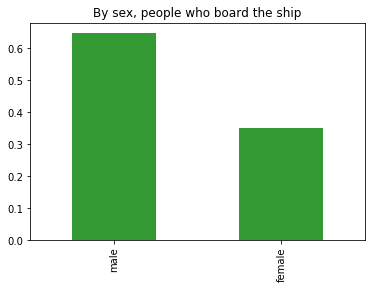

In [7]:
df.Sex.value_counts(normalize=True).plot(kind='bar', alpha=0.8, title="By sex, people who board the ship", color='g')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
cols = ['Name','Ticket','Cabin']
df = df.drop(cols, axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [11]:
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [12]:
dummies

[     1  2  3
 0    0  0  1
 1    1  0  0
 2    0  0  1
 3    1  0  0
 4    0  0  1
 ..  .. .. ..
 886  0  1  0
 887  1  0  0
 888  0  0  1
 889  1  0  0
 890  0  0  1
 
 [891 rows x 3 columns],      female  male
 0         0     1
 1         1     0
 2         1     0
 3         1     0
 4         0     1
 ..      ...   ...
 886       0     1
 887       1     0
 888       1     0
 889       0     1
 890       0     1
 
 [891 rows x 2 columns],      C  Q  S
 0    0  0  1
 1    1  0  0
 2    0  0  1
 3    0  0  1
 4    0  0  1
 ..  .. .. ..
 886  0  0  1
 887  0  0  1
 888  0  0  1
 889  1  0  0
 890  0  1  0
 
 [891 rows x 3 columns]]

In [13]:
titanic_dummies = pd.concat(dummies, axis=1)
titanic_dummies

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1
887,1,0,0,1,0,0,0,1
888,0,0,1,1,0,0,0,1
889,1,0,0,0,1,1,0,0


In [14]:
df = pd.concat((df,titanic_dummies),axis=1)

Now that we converted Pclass, Sex, Embarked values into columns, we drop the redundant same columns from the dataframe

In [15]:
df = df.drop(['Pclass','Sex','Embarked'],axis=1)

look at our new dataframe

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.9 KB


In [17]:
df['Age'] = df['Age'].interpolate() # where it take the top value and the value below and divide by 2 for NAN spots

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.9 KB


In [19]:
# Here, there are the same 891 entries with no missing/NaN values.

In [20]:
print(df.head())

   PassengerId  Survived   Age  SibSp  Parch     Fare  1  2  3  female  male  \
0            1         0  22.0      1      0   7.2500  0  0  1       0     1   
1            2         1  38.0      1      0  71.2833  1  0  0       1     0   
2            3         1  26.0      0      0   7.9250  0  0  1       1     0   
3            4         1  35.0      1      0  53.1000  1  0  0       1     0   
4            5         0  35.0      0      0   8.0500  0  0  1       0     1   

   C  Q  S  
0  0  0  1  
1  1  0  0  
2  0  0  1  
3  0  0  1  
4  0  0  1  


## Visualizing the data

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

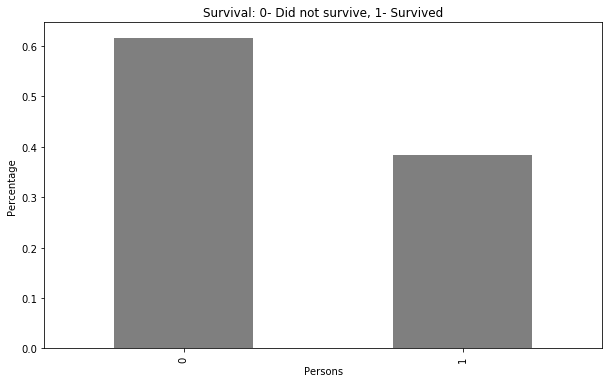

In [22]:
fig = plt.figure(figsize=(10, 6))

df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5, color='k')
plt.title("Survival: 0- Did not survive, 1- Survived")
plt.xlabel("Persons")
plt.ylabel("Percentage");

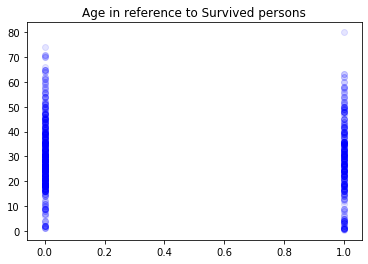

In [23]:
plt.scatter(df.Survived, df.Age, alpha=0.1, color='b')
plt.title("Age in reference to Survived persons")
plt.plot();

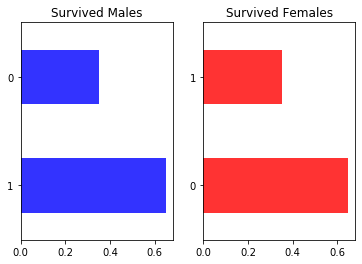

In [24]:
fig, ax = plt.subplots(1, 2)
df.Survived[df.male].value_counts(normalize=True).plot(kind='barh', alpha=0.8, title="Survived Males", color='b', ax=ax[0])
df.Survived[df.female].value_counts(normalize=True).plot(kind='barh', alpha=0.8,title="Survived Females", color='r', ax=ax[1])